# Python TFM Section

## Modelling II
1. Compare several models and use the most suitable for this case of study
2. Train and Test the final model and set it up implemented
3. Final conclusions

In [1]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
%pylab inline
plt.style.use('ggplot')
from pathlib import Path
import sklearn
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_modelize = pd.read_csv(Path.cwd() / 'Outputs' / 'DF_MODELIZE.csv', sep = ';', header = 0 , encoding = "ISO-8859-1",decimal=',')
df_modelize.head(5)

,VERSION,ID_UPR,ID_TECNOLOGIA,A. No Cobrados,AMONIACO,ATR,Ajuste,BONO_SOCIAL_PEGO,Banda,Bilateral,...,Res. Pot. Adicional,S. Regulacion,S. Res. Pot. Adicional,SERV_GEST_RES,TASAS_MEDIOAMB,TASA_ARAGON,Terciaria,UREA,VCF,POWER_MWH
0,201701,UPR115,NC,NaN,NaN,NaN,NaN,NaN,NaN,81778497.0,...,NaN,NaN,-36.0,-5156083.0,NaN,NaN,NaN,NaN,NaN,1111803.766
1,201701,UPR116,NC,NaN,NaN,NaN,NaN,NaN,NaN,68455391.0,...,NaN,NaN,NaN,-4357224.0,NaN,NaN,NaN,NaN,NaN,940091.558
2,201701,UPR1198,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-192.0,NaN,NaN,NaN,NaN,NaN,NaN,-1418.032
3,201701,UPR1205,EB,NaN,NaN,NaN,-124366.0,NaN,NaN,1578792.0,...,NaN,NaN,-455.0,NaN,-33711.0,NaN,55144.0,NaN,NaN,22830.702
4,201701,UPR1206,BX,NaN,NaN,NaN,-9972.0,NaN,NaN,NaN,...,NaN,NaN,-7.0,NaN,-16346.0,NaN,NaN,NaN,NaN,-418.593


Before aplying any model:

1. All NaNs are now filled with 0s 
2. I will create a synthetic column named INTEGRAL_COSTS summing every single cost column
3. Let's drop all the outliers and negative values
4. I filter by the technologie, dropping technologies 3 and 4 for being Bx and Bp
3. I will inspect the graphical aspect of the data INTEGRAL_COSTS vs POWER_MWH


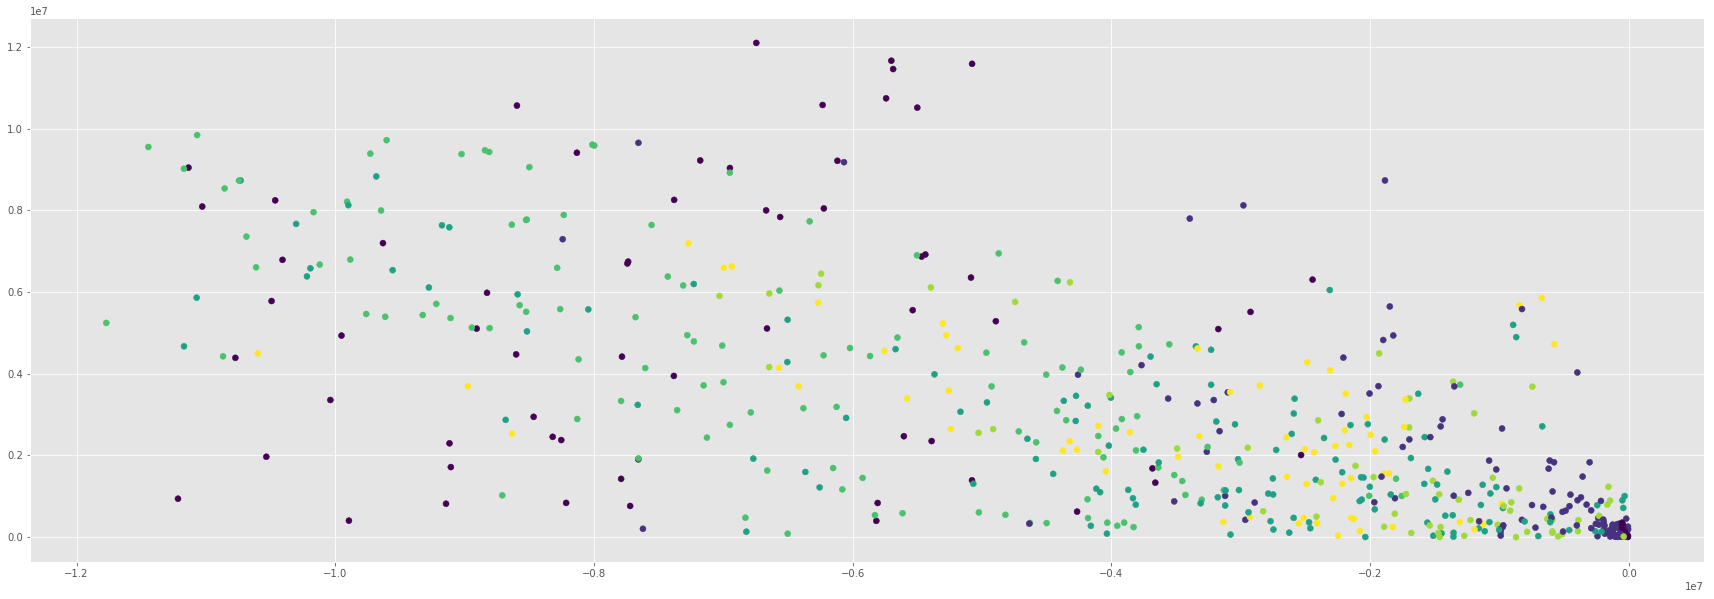

In [3]:
df_modelize = df_modelize.fillna(0)

df_modelize['INTEGRAL_COSTS']  = \
df_modelize['AMONIACO'] + \
df_modelize['ATR'] + \
df_modelize['BONO_SOCIAL_PEGO'] + \
df_modelize['CALIZAS'] + \
df_modelize['CANON HID'] + \
df_modelize['CANON_CONCESION'] + \
df_modelize['CANON_HID_CATALUÃÂA'] + \
df_modelize['CANON_NC_CATALUÃÂA'] + \
df_modelize['CANON_NC_EST'] + \
df_modelize['CENTIMO_VERDE'] + \
df_modelize['COSTE_COMBUSTIBLE'] + \
df_modelize['IMPUESTO ELECT'] + \
df_modelize['LUBRICANTES'] + \
df_modelize['OTROS'] + \
df_modelize['PEAJE GEN'] +  \
df_modelize['RELIQ_CANON_NC_CATALUÃÂA'] +  \
df_modelize['SERV_GEST_RES'] + \
df_modelize['TASAS_MEDIOAMB'] + \
df_modelize['TASA_ARAGON'] 



df_modelize2 = df_modelize[['VERSION','ID_TECNOLOGIA','POWER_MWH','INTEGRAL_COSTS']]
df_tech= df_modelize2[['ID_TECNOLOGIA']].drop_duplicates()
df_tech['NUM_TECH']= [1,2,3,4,5,6,7,8]
df_tech.reset_index
df_modelize2 = pd.merge(df_modelize2, df_tech, on=['ID_TECNOLOGIA'], how='left')
# df_modelize5['UNITARY_COST'] = df_modelize4['INTEGRAL_COSTS'] / df_modelize4['POWER_MWH']
df_modelize2 = df_modelize2[['VERSION','POWER_MWH','INTEGRAL_COSTS','NUM_TECH']]


df_modelize2= df_modelize2[(np.abs(stats.zscore(df_modelize2)) < 2).all(axis=1)].reset_index()
df_modelize2 = df_modelize2[['VERSION','POWER_MWH','INTEGRAL_COSTS','NUM_TECH']]
df_modelize2 = df_modelize2[(df_modelize2['POWER_MWH']>0)]
df_modelize2 = df_modelize2[(df_modelize2['INTEGRAL_COSTS']<0)]
df_modelize2 = df_modelize2[df_modelize2['NUM_TECH'] != 3]
df_modelize2 = df_modelize2[df_modelize2['NUM_TECH'] != 4]

plt.show(figsize(30,10))
plt.scatter(df_modelize2['INTEGRAL_COSTS'],df_modelize2['POWER_MWH'],c=df_modelize2['NUM_TECH'])


Here we can see the aspect of costs vs power for each technology remaining during the time

C:\Users\ES71531200G\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


   ID_TECNOLOGIA  NUM_TECH
0             NC         1
3             EB         2
4             BX         3
6             BP         4
8             GN         5
10            CI         6
21            HN         7
27            LN         8


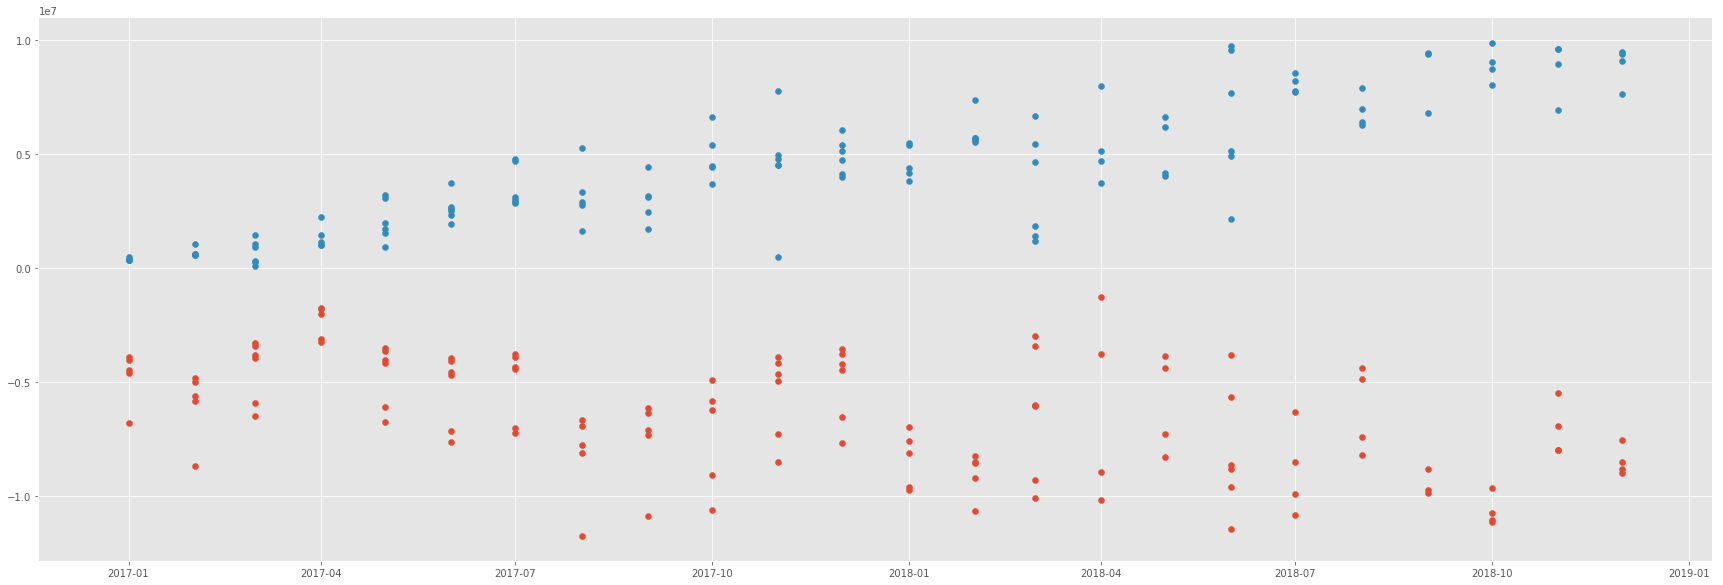

In [4]:
import numpy as np
import matplotlib.pyplot as plt

df_temp = df_modelize2[['VERSION', 'POWER_MWH', 'INTEGRAL_COSTS', 'NUM_TECH']]
df_temp['VERSION'] = pd.to_datetime(df_temp['VERSION'], format='%Y%m', errors='coerce').dropna()
#
tech = 6

plt.show(figsize(30,10))
plt.scatter(df_temp[df_temp['NUM_TECH'] == tech]['VERSION'], df_temp[df_temp['NUM_TECH'] == tech]['INTEGRAL_COSTS'])
plt.scatter(df_temp[df_temp['NUM_TECH'] == tech]['VERSION'], df_temp[df_temp['NUM_TECH'] == tech]['POWER_MWH'])
print(df_tech)


In [5]:
df_modelize5=df_modelize2

In [6]:
df_modelize5.head(10)

,VERSION,POWER_MWH,INTEGRAL_COSTS,NUM_TECH
0,201701,940091.558,-11215426.0,1
2,201701,22830.702,-242300.0,2
4,201701,11909.436,-105460.0,2
7,201701,84359.878,-4035043.0,5
8,201701,109060.598,-2625416.0,5
10,201701,474587.897,-6829530.0,6
13,201701,216999.300,-2462798.0,5
14,201701,186060.200,-2747524.0,5
15,201701,347537.922,-4629991.0,6
16,201701,343653.366,-4500749.0,6


# Model Aplication

First, I proceed to separate the data frame into Train-Test parts

For that, I divide the original df into two parts with the inputs on the matrix X and the  outputs desired on the matrix y
and the metric used for the evaluation at first will be MAE

## Instances Creation

In [7]:
# Import Library
from sklearn.model_selection import train_test_split

X = df_modelize5[['VERSION','NUM_TECH','POWER_MWH']]
y = df_modelize5['INTEGRAL_COSTS']


# Create Instance
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10 , random_state = 42)

## First aproach: Linear Regressor

In [8]:
# Load the library
from sklearn.linear_model import LinearRegression
# Create an instance of the model
regL = LinearRegression()
# Fit the regressor
regL.fit(X_train,y_train)
# Do predictions
y_regL_pred = regL.predict(X_test)

Let's check the mean absolute error as well as the distribution of the diferences between the test and the predictions

1753703.436361595
Mean error represents  -47 % from the mean value


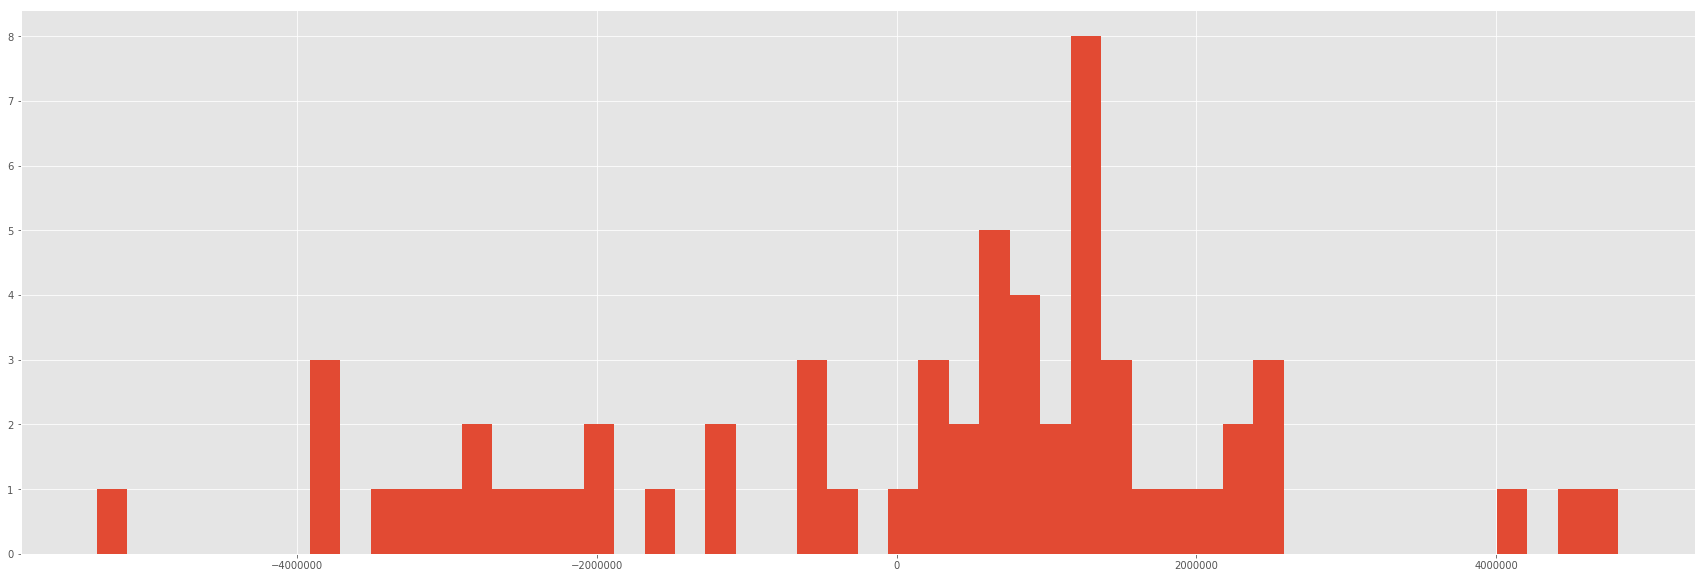

In [9]:
print(np.mean(np.abs(y_test-y_regL_pred)))
print("Mean error represents ", round(100*np.mean(np.abs(y_test-y_regL_pred))/df_modelize5['INTEGRAL_COSTS'].mean()), "% from the mean value")
plt.hist(y_test-y_regL_pred,bins=50);

## Second Aproach: KNeighbors

In [10]:
# Load the library
from sklearn.neighbors import KNeighborsRegressor
# Create an instance
regKN = KNeighborsRegressor(n_neighbors=15)
# Fit the data
regKN.fit(X_train,y_train)
# Do predictions
y_regKN_pred = regKN.predict(X_test)

1750167.6022222224
Mean error represents  -47 % from the mean value


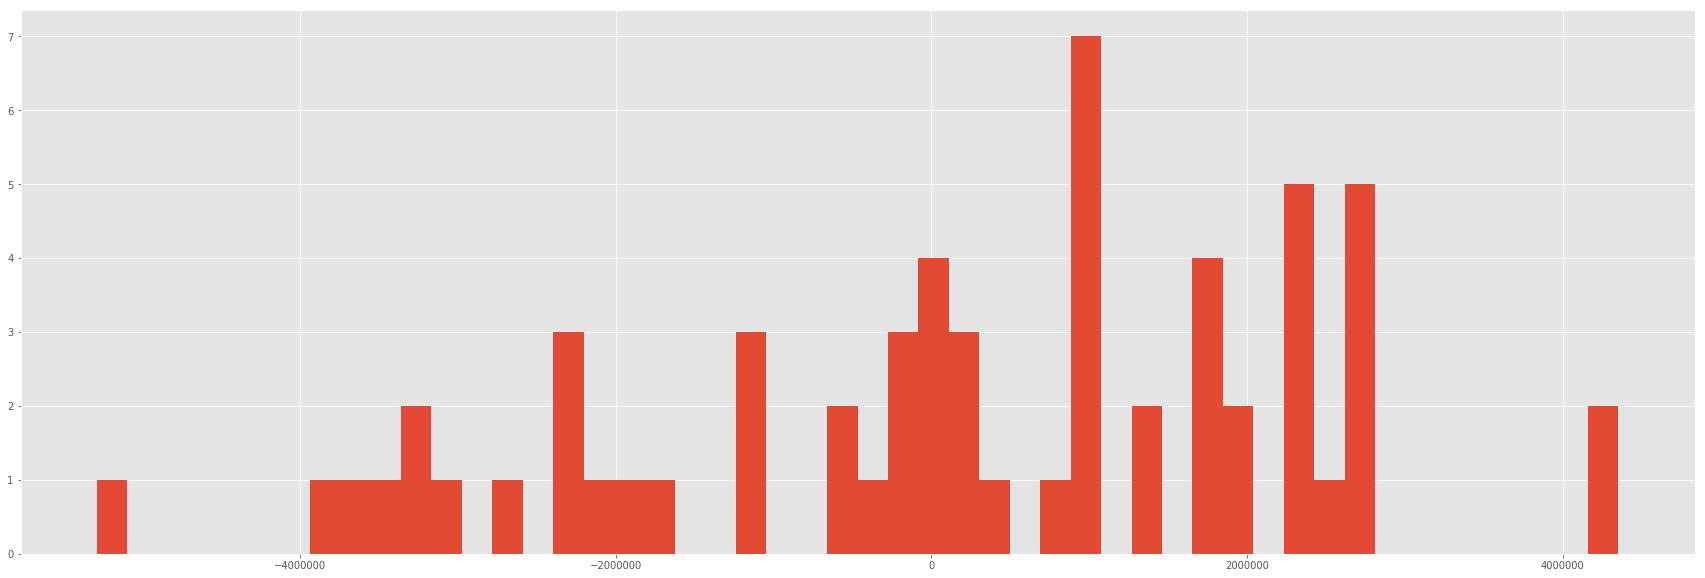

In [11]:
print(np.mean(np.abs(y_test-y_regKN_pred)))
print("Mean error represents ", round(100*np.mean(np.abs(y_test-y_regKN_pred))/df_modelize5['INTEGRAL_COSTS'].mean()), "% from the mean value")
plt.hist(y_test-y_regKN_pred,bins=50);

Now, I will apply a GridSearchCV to see how this could be improved

In [12]:
# Import Library
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Create instance
regGsCvKN = GridSearchCV(KNeighborsRegressor(),
                  param_grid = {"n_neighbors":np.arange(3,50)},
                  cv=5,
                  scoring="neg_mean_absolute_error",
                  verbose=9)
                     
                      
# Fit will test all of the combinations
regGsCvKN.fit(X,y)


print(regGsCvKN.best_params_)
print(regGsCvKN.best_score_)

Fitting 5 folds for each of 47 candidates, totalling 235 fits
[CV] n_neighbors=3 ...................................................
[CV] ......... n_neighbors=3, score=-1983097.2072829132, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=3, score=-1768296.512605042, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ......... n_neighbors=3, score=-2109317.0677966103, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ......... n_neighbors=3, score=-1959962.1694915255, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ......... n_neighbors=3, score=-1780023.0762711861, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ......... n_neighbors=4, score=-1985433.3991596638, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ......... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s


[CV] ......... n_neighbors=7, score=-1946075.1743341405, total=   0.0s
[CV] n_neighbors=7 ...................................................
[CV] ......... n_neighbors=7, score=-1832057.8026634385, total=   0.0s
[CV] n_neighbors=7 ...................................................
[CV] ......... n_neighbors=7, score=-1775703.7687651336, total=   0.0s
[CV] n_neighbors=8 ...................................................
[CV] ......... n_neighbors=8, score=-1998285.5682773108, total=   0.0s
[CV] n_neighbors=8 ...................................................
[CV] ......... n_neighbors=8, score=-1548824.5976890756, total=   0.0s
[CV] n_neighbors=8 ...................................................
[CV] ................ n_neighbors=8, score=-1910350.125, total=   0.0s
[CV] n_neighbors=8 ...................................................
[CV] ......... n_neighbors=8, score=-1888958.3199152541, total=   0.0s
[CV] n_neighbors=8 ...................................................
[CV] .

[CV] ........ n_neighbors=19, score=-1914645.4103479034, total=   0.0s
[CV] n_neighbors=19 ..................................................
[CV] ........ n_neighbors=19, score=-1826589.7957181085, total=   0.0s
[CV] n_neighbors=19 ..................................................
[CV] ........ n_neighbors=19, score=-1756546.4330954505, total=   0.0s
[CV] n_neighbors=20 ..................................................
[CV] ........ n_neighbors=20, score=-2003763.4840336135, total=   0.0s
[CV] n_neighbors=20 ..................................................
[CV] ........ n_neighbors=20, score=-1595885.3714285716, total=   0.0s
[CV] n_neighbors=20 ..................................................
[CV] ........ n_neighbors=20, score=-1913896.6805084746, total=   0.0s
[CV] n_neighbors=20 ..................................................
[CV] ........ n_neighbors=20, score=-1815152.6919491524, total=   0.0s
[CV] n_neighbors=20 ..................................................
[CV] .

[CV] ........ n_neighbors=31, score=-1557692.4109514775, total=   0.0s
[CV] n_neighbors=31 ..................................................
[CV] ........ n_neighbors=31, score=-1881011.9969928921, total=   0.0s
[CV] n_neighbors=31 ..................................................
[CV] ........ n_neighbors=31, score=-1796871.6962821211, total=   0.0s
[CV] n_neighbors=31 ..................................................
[CV] ........ n_neighbors=31, score=-1730047.9789502462, total=   0.0s
[CV] n_neighbors=32 ..................................................
[CV] ........ n_neighbors=32, score=-2011675.8658088236, total=   0.0s
[CV] n_neighbors=32 ..................................................
[CV] .......... n_neighbors=32, score=-1556205.56197479, total=   0.0s
[CV] n_neighbors=32 ..................................................
[CV] ........ n_neighbors=32, score=-1885806.1043432204, total=   0.0s
[CV] n_neighbors=32 ..................................................
[CV] .

[CV] ......... n_neighbors=45, score=-1895351.694915254, total=   0.0s
[CV] n_neighbors=45 ..................................................
[CV] ........ n_neighbors=45, score=-1754925.3758945384, total=   0.0s
[CV] n_neighbors=45 ..................................................
[CV] ........ n_neighbors=45, score=-1754684.5939736343, total=   0.0s
[CV] n_neighbors=46 ..................................................
[CV] ........ n_neighbors=46, score=-1997577.3222506398, total=   0.0s
[CV] n_neighbors=46 ..................................................
[CV] ........ n_neighbors=46, score=-1554895.7908293756, total=   0.0s
[CV] n_neighbors=46 ..................................................
[CV] ......... n_neighbors=46, score=-1895553.484156227, total=   0.0s
[CV] n_neighbors=46 ..................................................
[CV] ........ n_neighbors=46, score=-1754269.1665438472, total=   0.0s
[CV] n_neighbors=46 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 235 out of 235 | elapsed:    2.2s finished
C:\Users\ES71531200G\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [13]:
regGsKN = regGsCvKN.best_estimator_

In [14]:
# Do predictions
y_regGsKN_pred = regGsKN.predict(X_test)

1710828.790816327
Mean error represents  -46 % from the mean value


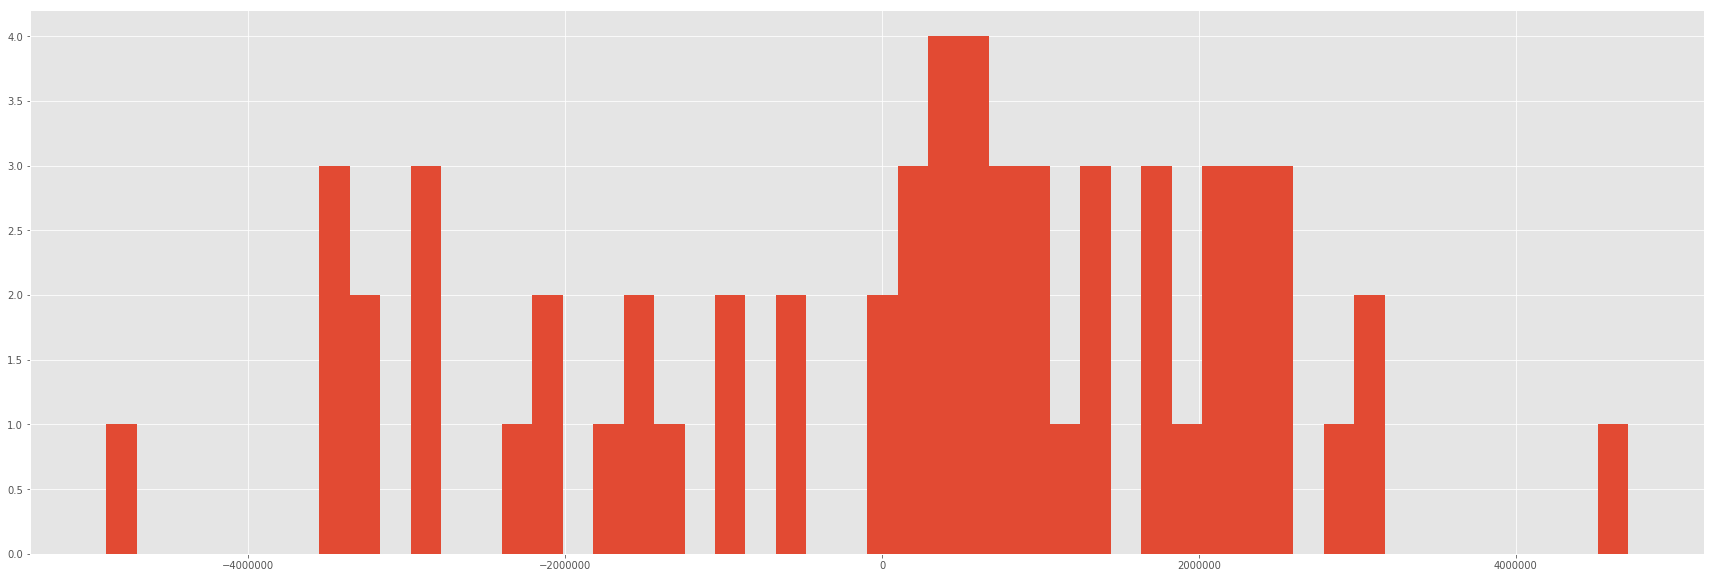

In [15]:
print(np.mean(np.abs(y_test-y_regGsKN_pred)))
print("Mean error represents ", round(100*np.mean(np.abs(y_test-y_regGsKN_pred))/df_modelize5['INTEGRAL_COSTS'].mean()), "% from the mean value")
plt.hist(y_test-y_regGsKN_pred,bins=50);

## Third: Decision Trees

A simple decision tree

In [16]:
# Load the library
from sklearn.tree import DecisionTreeRegressor
# Create an instance
regDT = DecisionTreeRegressor(max_depth=10)
# Fit the data
regDT.fit(X_train,y_train)
# Do predictions
y_regDT_pred = regDT.predict(X_test)

1147971.225793651
Mean error represents  -31 % from the mean value


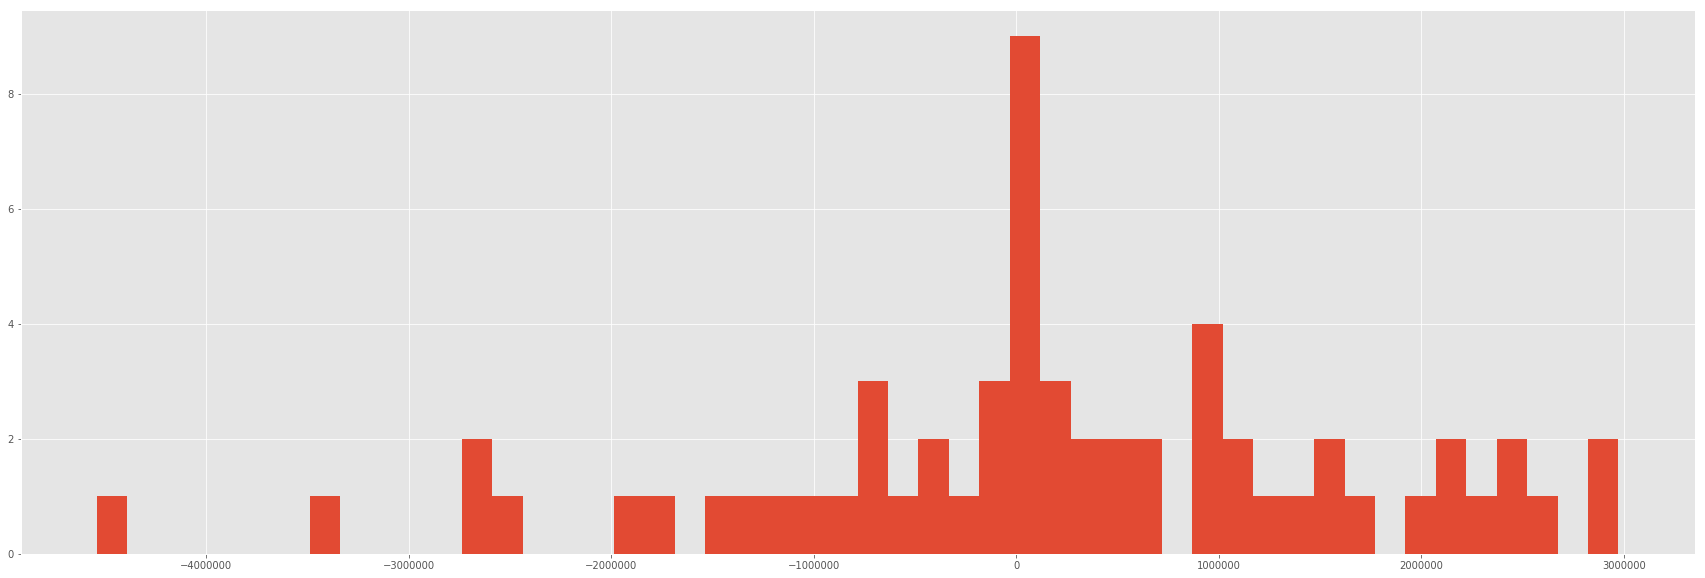

In [17]:
print(np.mean(np.abs(y_test-y_regDT_pred)))
print("Mean error represents ", round(100*np.mean(np.abs(y_test-y_regDT_pred))/df_modelize5['INTEGRAL_COSTS'].mean()), "% from the mean value")
plt.hist(y_test-y_regDT_pred,bins=50);

Now a random forest with GridSearchCV for finding the best parametres possible

In [18]:
# Import Library
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Create instance
regRF = GridSearchCV(RandomForestRegressor(),n_jobs=-1,
                  param_grid = {"min_samples_leaf":[1,2,3],
                               "max_depth":np.arange(3,20),
                               "n_estimators":[500]},
                  cv=5,
                  scoring="neg_mean_absolute_error",
                  verbose=9)
                     
                     
# Fit will test all of the combinations
regRF.fit(X_train,y_train)


print(regRF.best_params_)
print(regRF.best_score_)

regRFF = regRF.best_estimator_

Fitting 5 folds for each of 51 candidates, totalling 255 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 255 out of 255 | elapsed:  1.3min finished
C:\Users\ES71531200G\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set size

{'max_depth': 19, 'min_samples_leaf': 2, 'n_estimators': 500}
-1060736.964701804


In [19]:
# Do predictions
y_regRFF_pred = regRFF.predict(X_test)

1071346.0798495007
Mean error represents  -29 % from the mean value


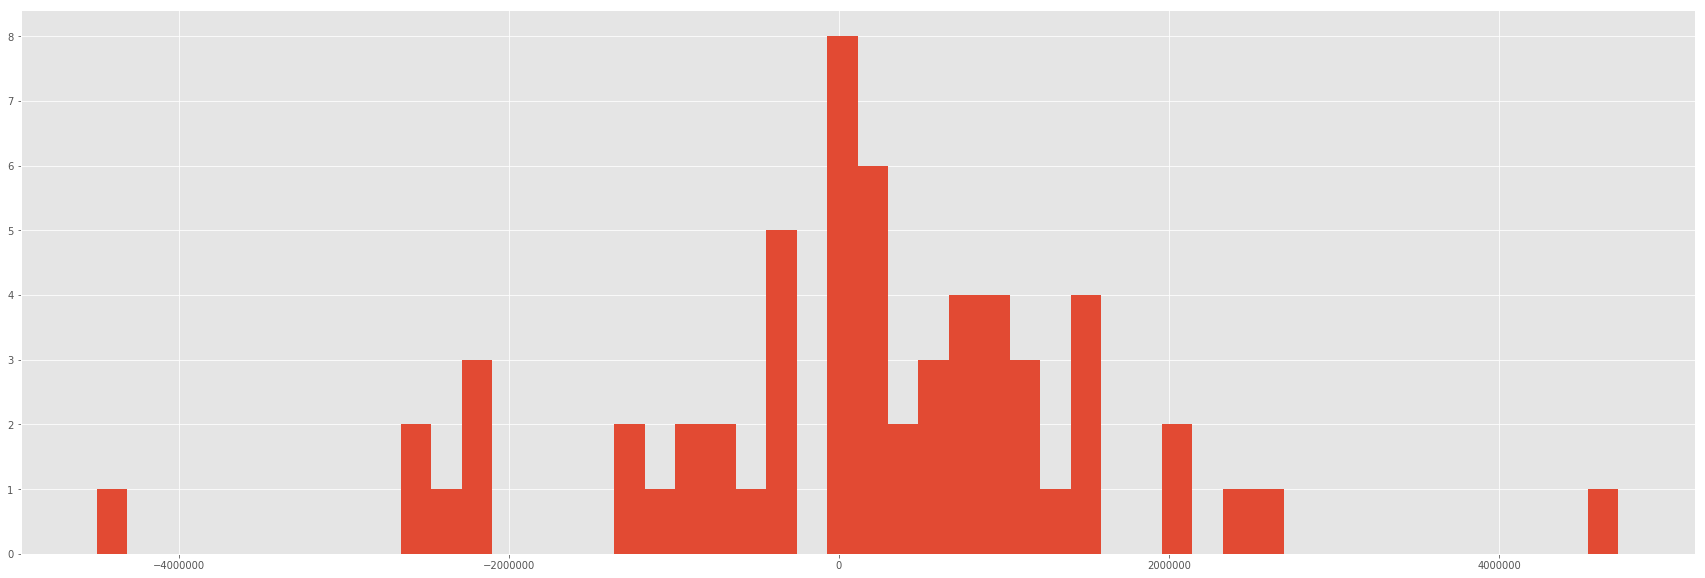

In [20]:
print(np.mean(np.abs(y_test-y_regRFF_pred)))
print("Mean error represents ", round(100*np.mean(np.abs(y_test-y_regRFF_pred))/df_modelize5['INTEGRAL_COSTS'].mean()), "% from the mean value")
plt.hist(y_test-y_regRFF_pred,bins=50);

Finally an xgBooster 

In [21]:
# Load the library
import xgboost as XGB
# Create an instance
regXGB = XGB.XGBRegressor(n_estimators=100, 
                          learning_rate=0.1, 
                          gamma=0, 
                          subsample=0.7,
                          colsample_bytree=1, 
                          max_depth=6)
# Fit the data
regXGB.fit(X_train,y_train)
# Do predictions
y_regXGB_pred = regXGB.predict(X_test)

1021377.954703776
Mean error represents  -27 % from the mean value


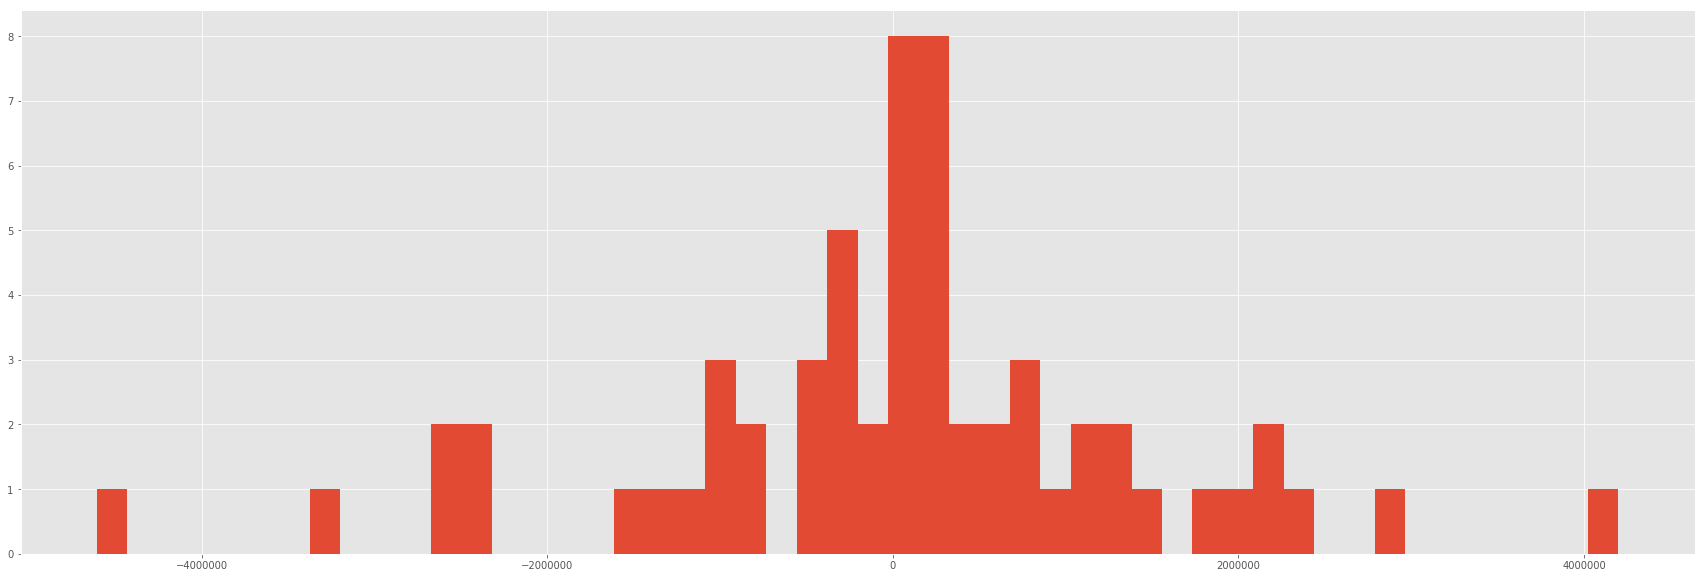

In [22]:
print(np.mean(np.abs(y_test-y_regXGB_pred)))
print("Mean error represents ", round(100*np.mean(np.abs(y_test-y_regXGB_pred))/df_modelize5['INTEGRAL_COSTS'].mean()), "% from the mean value")
plt.hist(y_test-y_regXGB_pred,bins=50);

In [23]:
# Load the library
from sklearn.model_selection import GridSearchCV
import xgboost as XGB

In [24]:
# Load the library
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor
# Create an instance
        
xgb1 = XGBRegressor()
parameters = {'nthread':[4], 
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth':np.arange(3,10),
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree':np.arange(0.3,1),
              'n_estimators': [100]}

regXGB = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = -1,
                        scoring="neg_mean_absolute_error",
                        verbose=9)

# Fit the data
regXGB.fit(X_train,y_train)


print(regXGB.best_params_)
print(regXGB.best_score_)

regXGB = regXGB.best_estimator_



Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    7.6s


{'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'nthread': 4, 'silent': 1, 'subsample': 0.7}
-1373747.6224227562


[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    9.2s finished
C:\Users\ES71531200G\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


1191671.2884114583
Mean error represents  -32 % from the mean value


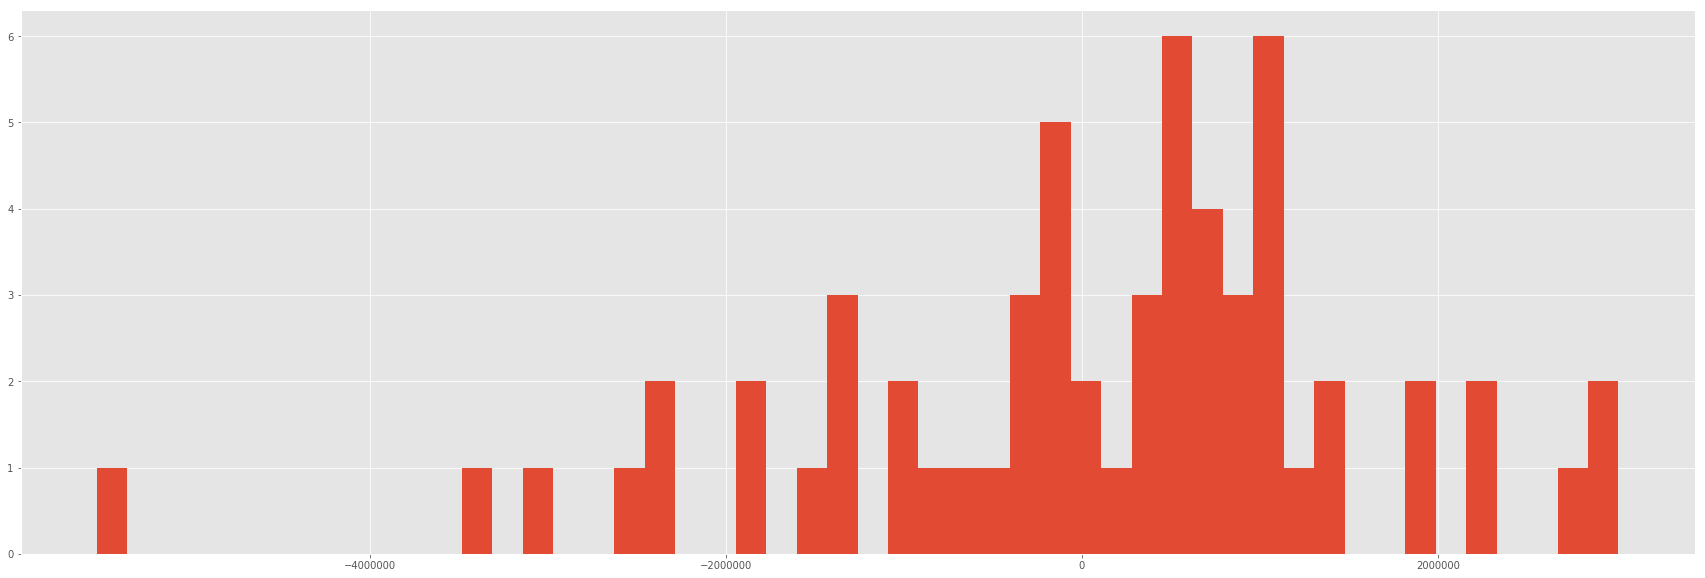

In [25]:
# Do predictions
y_regXGB_pred = regXGB.predict(X_test)
print(np.mean(np.abs(y_test-y_regXGB_pred)))
print("Mean error represents ", round(100*np.mean(np.abs(y_test-y_regXGB_pred))/df_modelize5['INTEGRAL_COSTS'].mean()), "% from the mean value")
plt.hist(y_test-y_regXGB_pred,bins=50);

## Fourth and Last (I hope): Support Vector Machine Regression

In [77]:
# Load the library
from sklearn.svm import SVR
# Create an instance
regSVR = SVR(kernel="rbf",C=0.1)
# Fit the data
regSVR.fit(X_train,y_train)
# Do predictions
y_regSVR_pred = regSVR.predict(X_test)

C:\Users\ES71531200G\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


2655209.9
Mean error represents  -71 % from the mean value


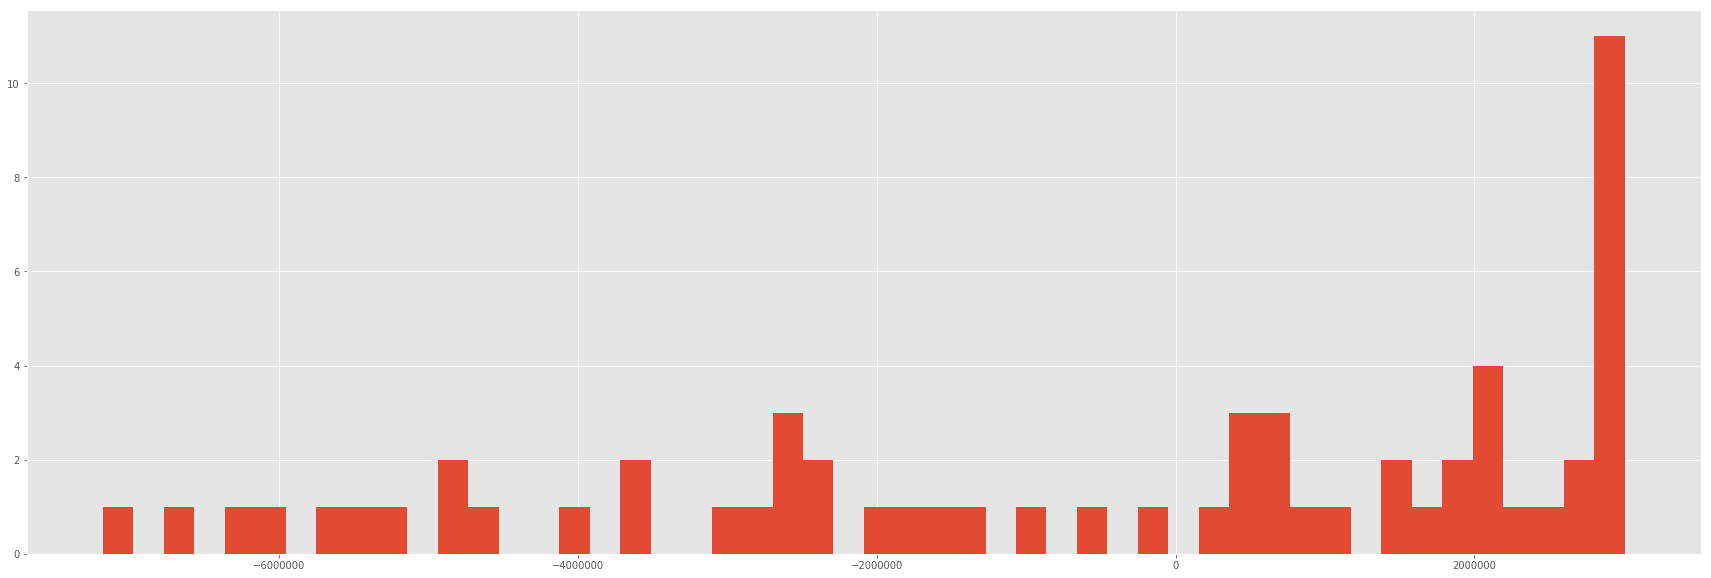

In [78]:
print(np.mean(np.abs(y_test-y_regSVR_pred)))
print("Mean error represents ", round(100*np.mean(np.abs(y_test-y_regSVR_pred))/df_modelize5['INTEGRAL_COSTS'].mean()), "% from the mean value")
plt.hist(y_test-y_regSVR_pred,bins=50);

# Representation

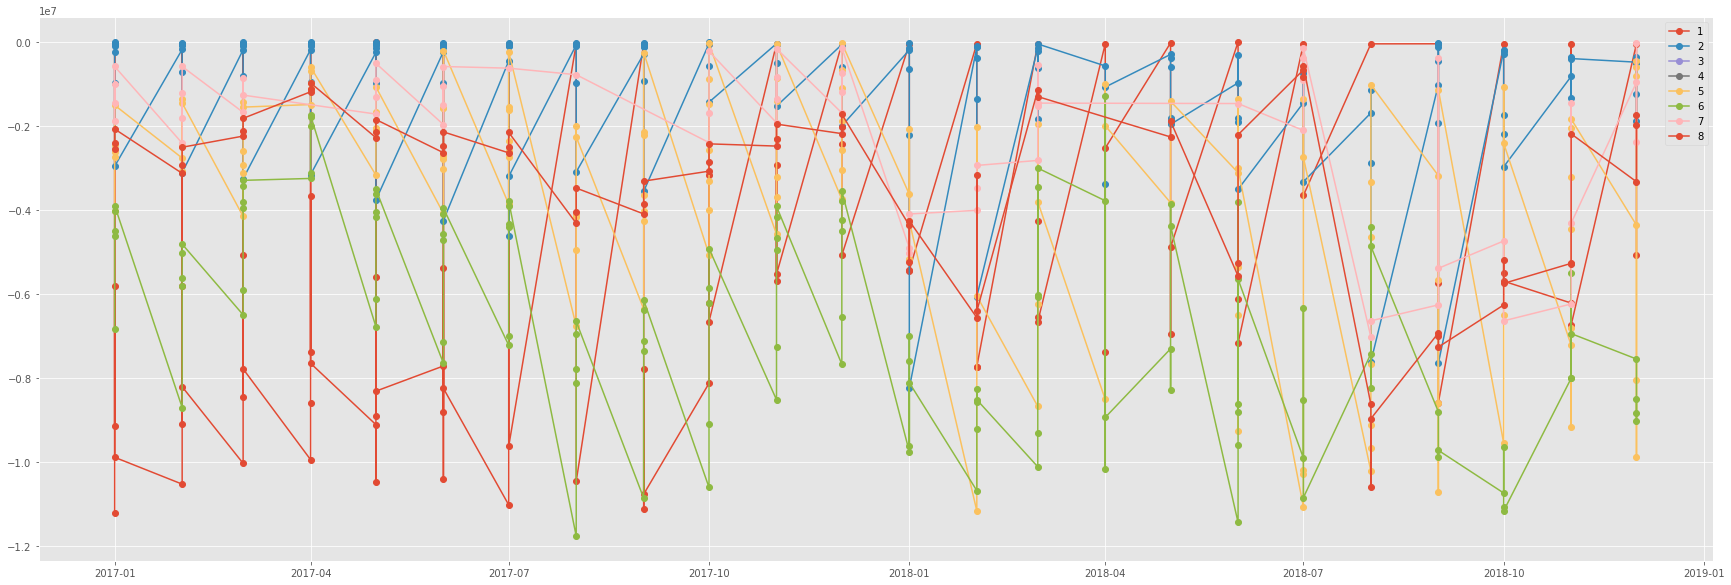

In [79]:
import numpy as np
import matplotlib.pyplot as plt

df_temp = df_modelize5
df_temp['VERSION'] = pd.to_datetime(df_modelize5['VERSION'], format='%Y%m', errors='coerce').dropna()

for i in range(1,9):
    tech = i
    plt.plot(df_temp[df_modelize5['NUM_TECH'] == tech]['VERSION'], df_temp[df_modelize5['NUM_TECH'] == tech]['INTEGRAL_COSTS'], '-o')
    legend(range(1,9))

plt.show(figsize(30,10))

   ID_TECNOLOGIA  NUM_TECH
0             NC         1
3             EB         2
4             BX         3
6             BP         4
8             GN         5
10            CI         6
21            HN         7
27            LN         8


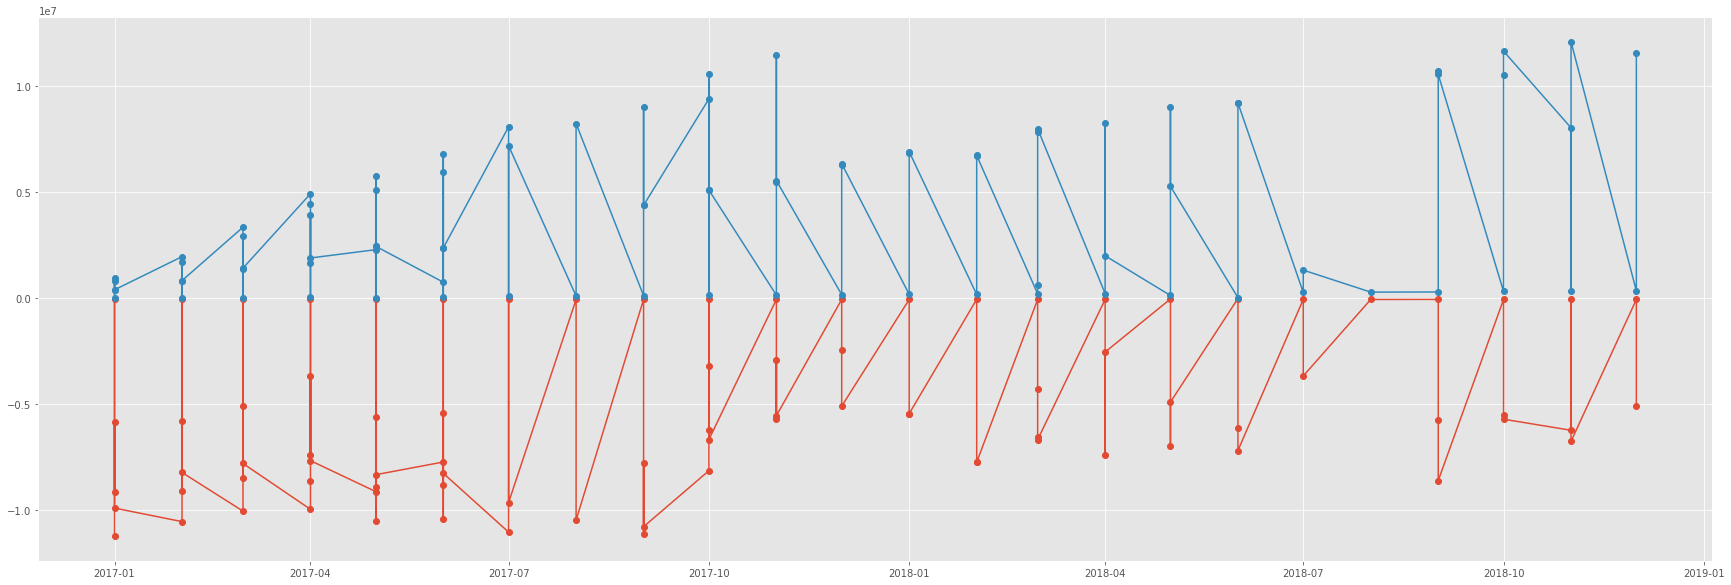

In [81]:
import numpy as np
import matplotlib.pyplot as plt

df_temp = df_modelize5
df_temp['VERSION'] = pd.to_datetime(df_modelize5['VERSION'], format='%Y%m', errors='coerce').dropna()


tech = 1
plt.plot(df_temp[df_modelize5['NUM_TECH'] == tech]['VERSION'], df_temp[df_modelize5['NUM_TECH'] == tech]['INTEGRAL_COSTS'], '-o')
plt.plot(df_temp[df_modelize5['NUM_TECH'] == tech]['VERSION'], df_temp[df_modelize5['NUM_TECH'] == tech]['POWER_MWH'], '-o')
print(df_tech)
plt.show(figsize(30,10))